In [660]:
#Naive Bayes on taitanic dataset
#
#Importing numpy and pandas
#reading the csv

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

ds=pd.read_csv("titanic.csv")

In [661]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [662]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [663]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


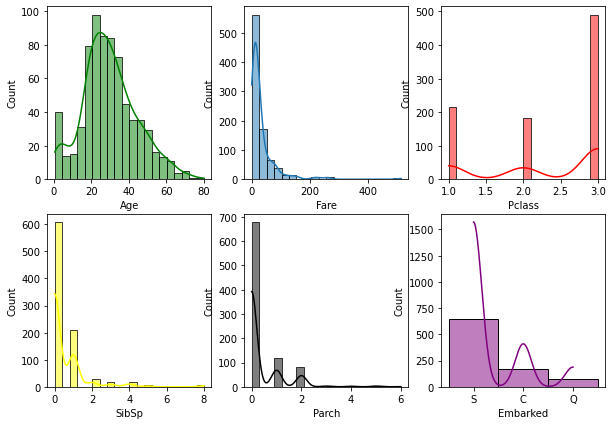

In [664]:
#Plotting the features

fig,axes=plt.subplots(2,3,figsize=(10,7))
sn.histplot(ds["Fare"],kde=True,ax=axes[0][1],bins=20)
sn.histplot(ds["Age"],kde=True,bins=20,ax=axes[0][0],color="green")
sn.histplot(ds["Pclass"],kde=True,bins=20,ax=axes[0][2],color="red")
sn.histplot(ds["SibSp"],kde=True,bins=20,ax=axes[1][0],color="yellow")
sn.histplot(ds["Parch"],kde=True,bins=20,ax=axes[1][1],color="black")
sn.histplot(ds["Embarked"],kde=True,bins=20,ax=axes[1][2],color="purple")
plt.show()

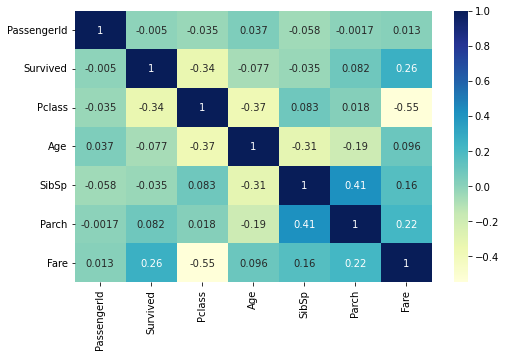

In [665]:
fig=plt.figure(figsize=(8,5))
sn.heatmap(ds.corr(),cmap = 'YlGnBu', annot = True)
plt.show()

In [666]:
#,"SibSp","Parch","Pclass","Embarked","Sex"
ds.drop(columns=["PassengerId","Ticket","Name","Cabin"],inplace=True)

In [667]:
#encoding categorical feature
cat_col = ds.select_dtypes(['object']).columns
print(cat_col)
ds[cat_col]=ds[cat_col].apply(lambda x: pd.factorize(x)[0])

Index(['Sex', 'Embarked'], dtype='object')


In [668]:
ds.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [669]:
ds["Age"].mean(axis=0,skipna=True)

29.69911764705882

In [670]:
ds["Age"].fillna(ds["Age"].mean(axis=0,skipna=True),inplace=True)

In [671]:
ds.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [672]:
# Normalising Age and Fare (Z normalisation)
ds["Age"]=(ds["Age"]-ds["Age"].mean())/ds["Age"].std()
ds["Fare"]=(ds["Fare"]-ds["Fare"].mean())/ds["Fare"].std()

In [673]:
class NaiveBayes():

    def prior(self,y):
        classes=list(y.unique())
        prior=[]
        for i in classes:
            prior.append((y==i).sum()/y.shape[0])
        return prior

    def likelihood(self,x,datapoint,feature,label,y):
        x["sur"]=y
        x=x[x["sur"]==label]
        #print(x)
        mean,std= x[feature].mean(),x[feature].std()
        postpr=(1 / (np.sqrt(2*np.pi)* std) ) * np.exp( -(datapoint[feature]- mean)**2 / (2 * std ** 2))
        # postprob=(1/(np.sqrt(2*x[feature].std())))*np.exp(-(d[feature]-x[feature].mean())**2 / 2*x[feature].std()**2)
        return postpr
    
    def fit(self,x,y):
        prior=self.prior(y)
        return prior
    
    def predict(self,x,y,prior):
        classes=list(y.unique())
        features=list(x.columns)
        print(classes)
        print(features)
        print(prior)
        y_pred=[]
        #print(x.shape[0])
        for d in range(x.shape[0]):
            likeli=[1]*len(classes)
            for i in classes:
                for j in features:
                    likeli[i]*=self.likelihood(x,x.iloc[d,:],j,i,y)
            #print(likeli)
            postprob=[1]*len(classes)
            max=-1.7976931348623157e+308
            index=-1
            for i in classes:
                postprob[i]=likeli[i]*prior[i]
                if(postprob[i]>max):
                    max=postprob[i]
                    index=i
            # print(index)
            #print(postprob)
            y_pred.append(index)
        return y_pred

    def accuracy(self,y_test,y_pred):
        count=0
        tp=0
        fn=0
        fp=0
        tn=0
        for i in range(y_test.shape[0]):
            if(y_test[i]==y_pred[i]):
                count+=1
            #TP
            if(y_test[i]==y_pred[i] and y_test[i]==1):
                tp+=1
            #TN
            elif(y_test[i]==y_pred[i] and y_test[i]==0):
                tn+=1
            #FP
            elif(y_test[i] != y_pred[i] and y_pred[i]==1):
                fp+=1
            #FN
            else:
                fn+=1
            
        #print(tp,fp,tn,fn)
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=2*(precision*recall/(precision+recall))
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1)
        return (count/y_test.shape[0])

In [674]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-5.921480e-01,1,0,-0.502163,0
1,1,1,1,6.384304e-01,1,0,0.786404,1
2,1,3,1,-2.845034e-01,0,0,-0.488580,0
3,1,1,1,4.076970e-01,1,0,0.420494,0
4,0,3,0,4.076970e-01,0,0,-0.486064,0
...,...,...,...,...,...,...,...,...
886,0,2,0,-2.075923e-01,0,0,-0.386454,0
887,1,1,1,-8.228815e-01,0,0,-0.044356,0
888,0,3,1,4.371893e-15,1,2,-0.176164,0
889,1,1,0,-2.845034e-01,0,0,-0.044356,1


In [675]:
"""
Naive basyes data split

Split data
"""
ds=ds.sample(frac=1)
x_train=ds.iloc[:int(ds.shape[0]*0.8),1:8]
y_train=ds.iloc[:int(ds.shape[0]*0.8),0]

x_test=ds.iloc[int(ds.shape[0]*0.8):,1:8]
y_test=ds.iloc[int(ds.shape[0]*0.8):,0]

#print(x_test)
##testing
# y=(y_test.unique())
# print(y)
# prior=[]
# print(y_test.value_counts())
# for i in y:
#     #print(i)
#     print(len(y_test))
#     prior.append((y_test==i).sum()/len(y_test))
# print (prior)

# x=x_test

# feature="Fare"
# x["sur"]=y_test
# #print(x)
# x=x[x["sur"]==0]
# print(x)
# d=x.iloc[1,:] 
# print(d)
# mean,std= x[feature].mean(),x[feature].std()
# print(mean ,std, (d[feature]- mean)**2, 2 * std ** 2, np.exp( -(d[feature]- mean)**2 / (2 * std ** 2)),1 / (np.sqrt(2*np.pi)* std))
# postprob=(1 / (np.sqrt(2*np.pi)* std) ) * np.exp( -(d[feature]- mean)**2 / (2 * std ** 2))
# print(postprob)

In [676]:
"""
Naive bayes classification
"""
model=NaiveBayes()
prior=model.fit(x_train,y_train)


In [677]:
""""
Naive bayes classification

predict
"""
y_pred=model.predict(x_test,y_test,prior)

#print(y_pred)

arr=y_test.values
y_test=arr.reshape((y_test.shape[0],1))
#print(y_test)
print(model.accuracy(y_test,y_pred))

[0, 1]
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[0.6179775280898876, 0.38202247191011235]
Precision: 0.7301587301587301
Recall: 0.6571428571428571
F1 Score: 0.6917293233082706
0.770949720670391
